<a href="https://colab.research.google.com/github/jen0707/AIModeling/blob/Classify/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
nbastat = pd.read_csv("nbastat2022c.csv")
nbastat

,#,PLAYER,Position,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EF
0,1,Joel Embiid,C,56,33.4,29.9,9.4,19.3,48.9,1.4,...,11.9,82.1,2.1,9.3,11.4,4.4,1.0,1.4,3.0,33.2
1,2,Giannis Antetokounmpo,F,59,32.9,29.8,10.2,18.6,54.7,1.1,...,11.6,72.1,2.0,9.5,11.5,5.8,1.1,1.4,3.2,34.8
2,3,LeBron James,F,51,36.9,29.5,11.1,21.3,52.0,2.8,...,6.0,76.0,1.1,7.0,8.1,6.2,1.4,1.1,3.5,31.1
3,4,Luka Doncic,G,53,35.7,28.2,9.9,21.8,45.5,2.9,...,7.4,74.4,0.9,8.4,9.3,8.6,1.2,0.6,4.5,29.6
4,5,Trae Young,G,64,34.9,28.0,9.3,20.4,45.6,3.0,...,7.2,90.0,0.6,3.2,3.8,9.5,1.0,0.1,4.0,26.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,243,Isaiah Joe,G,48,11.6,3.6,1.1,3.3,35.0,0.8,...,0.5,92.3,0.1,0.9,1.0,0.7,0.3,0.1,0.3,3.1
243,244,Tony Snell,G,49,15.8,3.4,1.2,3.1,39.2,0.9,...,0.1,100.0,0.3,1.7,2.0,0.5,0.3,0.2,0.4,4.1
244,245,Dalano Banton,G,58,11.5,3.4,1.4,3.4,40.3,0.2,...,0.7,61.5,0.6,1.4,2.0,1.6,0.5,0.2,0.9,4.4
245,246,Trent Forrest,G,54,12.6,3.2,1.2,2.5,50.4,0.1,...,0.8,83.7,0.3,1.3,1.6,1.7,0.5,0.1,0.9,5.0


In [ ]:
m = len(nbastat)
print(m)

247


In [ ]:
#특징 추출
# X <- "REB", "AST", "STL", "BLK"
# Y <- "Position"이 "C"이면 1, 아니면 0

X = nbastat[["REB", "AST", "STL", "BLK"]]
Y = nbastat["Position"].apply(lambda x : 1 if x == "C" else 0)

print(X.shape)
print(Y.shape)

(247, 4)
(247,)


In [ ]:
X = X.dropna()
Y = Y.dropna()

print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
X = (np.array(X)).reshape(m, 4)
Y = (np.array(Y)).reshape(m, 1)

print(X.shape)
print(Y.shape)
print(type(X))
print(type(Y))

(247, 4)
(247, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


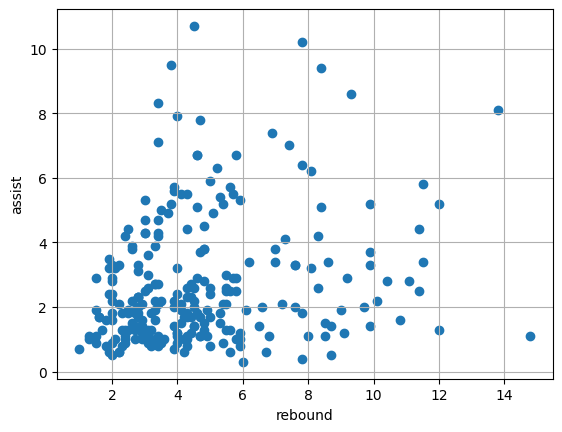

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("rebound")
plt.ylabel("assist")
plt.grid(True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1004)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(172, 4)
(75, 4)
(172, 1)
(75, 1)


In [ ]:
#로지스틱 회귀 모델 정의
class LogisticRegression:
  #1. 초기화 함수
  def __init__(self, lr = 0.1, epochs = 1000):
    self.lr = lr
    self.epochs = epochs
    self.theta = None

  #2. 기본 함수
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def compute_loss (self, Y, Y_hat):
    m = len(Y)
    return -1/m * np.sum(Y * np.log(Y_hat + 1e-8) + (1 -Y) * np.log(1 - Y_hat + 1e-8))

  #3. 훈련 함수
  def fit(self, X, Y):
    m, n = X.shape
    X = np.hstack([np.ones((m, 1)), X])
    self.theta = np.zeros(n+1).reshape(n+1, 1)

    losses = []
    for i in range(self.epochs):
      z = np.dot(X, self.theta)
      Y_hat = self.sigmoid(z)
      gradient = (1/m) * X.T.dot(Y_hat - Y)
      self.theta = self.theta - self.lr * gradient

      loss = self.compute_loss (Y, Y_hat)
      losses.append(loss)

    return losses

  #4. 추론 함수
  def predic_probability(self, X):
    m = X.shape[0]
    X = np.hstack([np.ones((m, 1)), X])
    return self.sigmoid(np.dot(X, self.theta))

  def predict(self, X, threshold = 0.5):
    probability = self.predic_probability(X)
    return (probability >= threshold).astype(int)


In [ ]:
model = LogisticRegression(lr = 0.1, epochs = 1000)
losses = model.fit(X_train, Y_train)

Y_train_hat = model.predict(X_train)
Y_test_hat = model.predict(X_test)

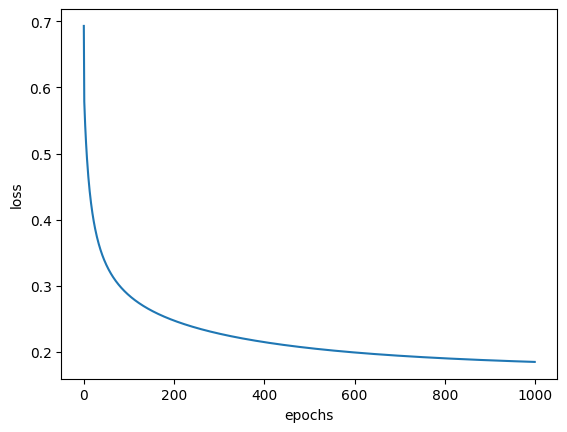

In [ ]:
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
#confusion matrix -> f-1 score
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_test_hat)

tn, fp, fn, tp = cm.ravel()

#prediction, recall, f-1 score
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(cm)

print(f"precision: {precision:.4}")
print(f"recall: {recall:.4}")
print(f"f1_score: {f1_score:.4}")

[[62  0]
 [ 4  9]]
precision: 1.0
recall: 0.6923
f1_score: 0.8182
